Accuracy on training set for DTC4: 1.000
Accuracy on testing set for DTC4: 0.933


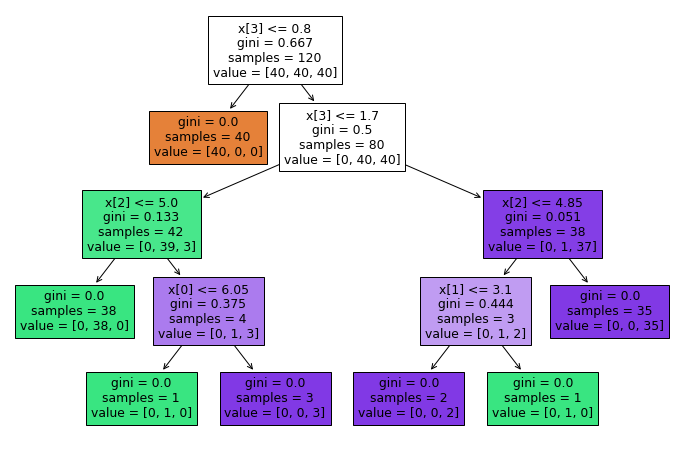

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=45, stratify=iris.target)


dtc4 = DecisionTreeClassifier(max_depth=4)
dtc4.fit(X_train, y_train)

y_pred_train_dtc4 = dtc4.predict(X_train)
y_pred_test_dtc4 = dtc4.predict(X_test)

acc_train_dtc4 = accuracy_score(y_train, y_pred_train_dtc4)
acc_test_dtc4 = accuracy_score(y_test, y_pred_test_dtc4)

print(f"Accuracy on training set for DTC4: {acc_train_dtc4:.3f}")
print(f"Accuracy on testing set for DTC4: {acc_test_dtc4:.3f}")

from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(dtc4, filled=True, ax=ax)
plt.show()


Training accuracy: 1.0
Testing accuracy: 0.9122807017543859


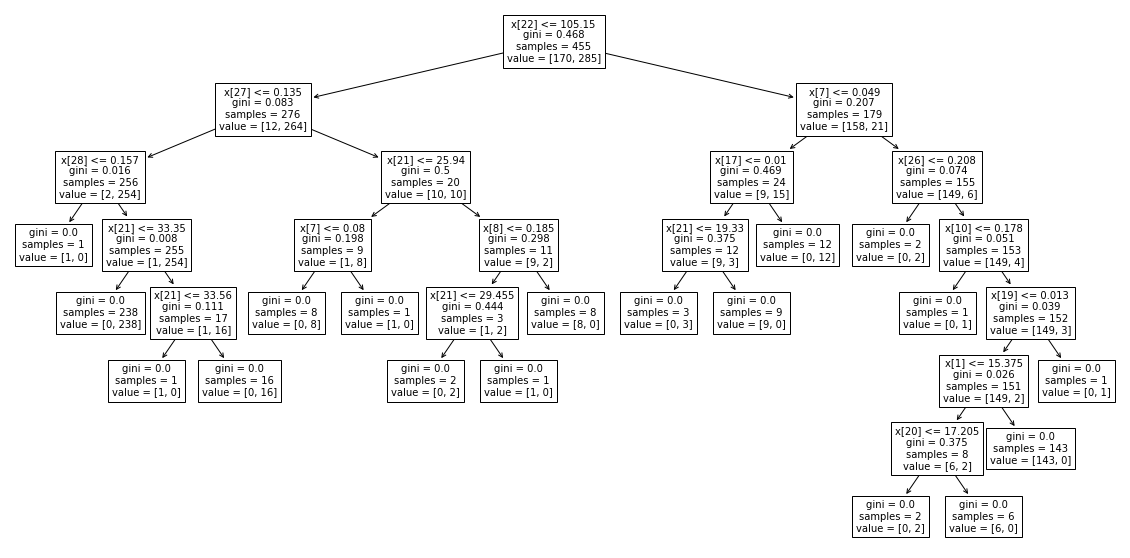

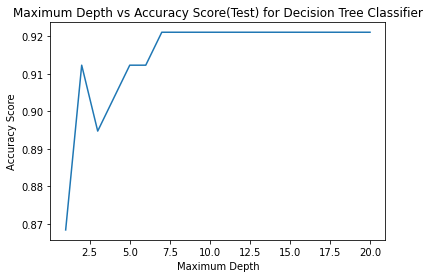

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, stratify=y)

clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

train_preds = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)
print("Training accuracy:", train_accuracy)

test_preds = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print("Testing accuracy:", test_accuracy)

plt.figure(figsize=(20,10))
plot_tree(clf, fontsize=10)
plt.show()

max_depths = range(1, 21)

accuracy_scores = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=45)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    accuracy_scores.append(accuracy)

plt.plot(max_depths, accuracy_scores)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy Score')
plt.title('Maximum Depth vs Accuracy Score(Test) for Decision Tree Classifier')
plt.show()

<ipython-input-25-1a5a4dd0e17a>:18: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  data = data.replace('?', pd.np.nan)


Mean squared error on training set: 1066815.729
Mean squared error on testing set: 3204194.887


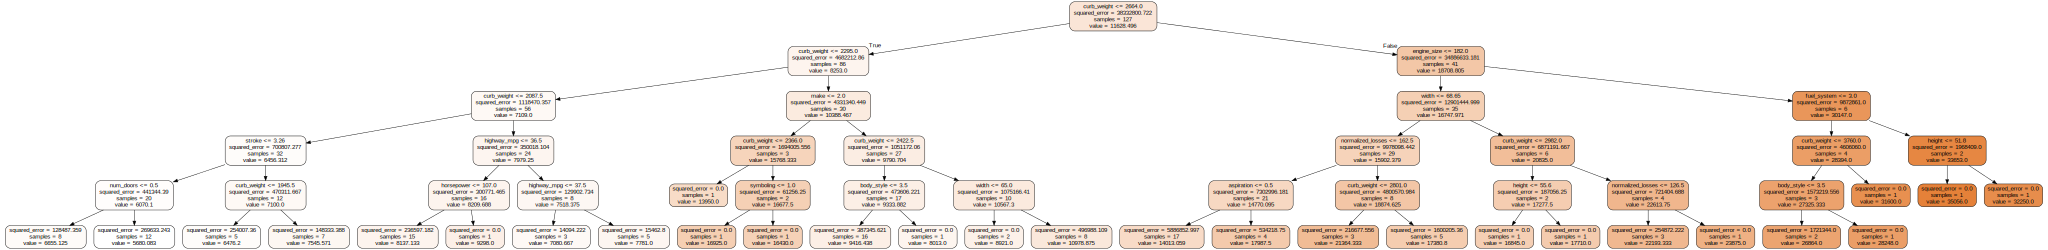

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import graphviz

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
data = pd.read_csv(url, header=None)

column_names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
                'num_doors', 'body_style', 'drive_wheels', 'engine_location',
                'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
                'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
                'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
data.columns = column_names

data = data.replace('?', pd.np.nan)

data = data.dropna()

le = LabelEncoder()
data['make'] = le.fit_transform(data['make'])
data['fuel_type'] = le.fit_transform(data['fuel_type'])
data['aspiration'] = le.fit_transform(data['aspiration'])
data['num_doors'] = le.fit_transform(data['num_doors'])
data['body_style'] = le.fit_transform(data['body_style'])
data['drive_wheels'] = le.fit_transform(data['drive_wheels'])
data['engine_location'] = le.fit_transform(data['engine_location'])
data['engine_type'] = le.fit_transform(data['engine_type'])
data['num_cylinders'] = le.fit_transform(data['num_cylinders'])
data['fuel_system'] = le.fit_transform(data['fuel_system'])

X_train, X_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.2, random_state=42)

dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(X_train, y_train)

y_pred_train = dtr.predict(X_train)
y_pred_test = dtr.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Mean squared error on training set: {mse_train:.3f}")
print(f"Mean squared error on testing set: {mse_test:.3f}")

dot_data = export_graphviz(dtr, out_file=None, feature_names=data.columns[:-1], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("car_prediction_decision_tree", format='png', cleanup=True)
graph


